In [1]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo
cdo = Cdo()

import plotting_helpers as ph

## RECCAP2 Ocean Regions

In [2]:
inpath = "./data/"
file = "RECCAP2_region_masks_all_v20221025.nc"
# https://github.com/RECCAP2-ocean/R2-shared-resources/blob/master/data/regions/RECCAP2_region_masks_all_v20221025.nc

In [5]:
ds_ocean_regions = xr.open_dataset(inpath + file)
ds_ocean_regions

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360)
Coordinates:
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    seamask     (lat, lon) int8 ...
    coast       (lat, lon) int8 ...
    open_ocean  (lat, lon) int8 ...
    atlantic    (lat, lon) int8 ...
    pacific     (lat, lon) int8 ...
    indian      (lat, lon) int8 ...
    arctic      (lat, lon) int8 ...
    southern    (lat, lon) int8 ...
Attributes:
    date:         2022-06-20
    contact:      gregorl@ethz.ch
    description:  regional masks created for the RECCAP2 ocean chapters. The ...
    helper_code:  The following snippet of code can be used to list the regio...

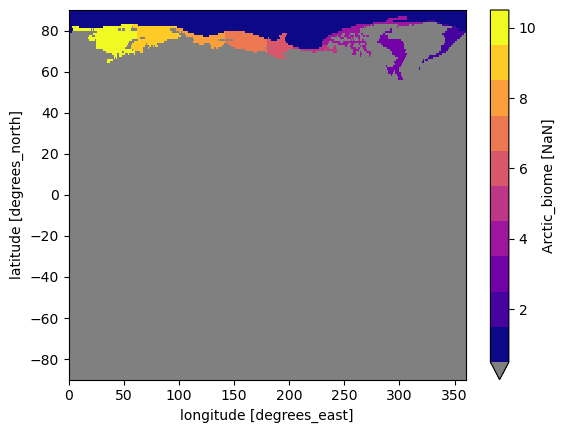

In [6]:
cmap = ph.create_discrete_colormap(colormap='plasma', steps=10, under="gray")
ds_ocean_regions.arctic.plot(cmap=cmap, vmin=0.5, vmax=10.5)

### Produce Arctic 1-0-Mask

In [11]:
# variable arctic goes from 1 
mask = ds_ocean_regions.arctic.values.copy()
mask[mask > 0] = 1

ds_arctic_ocean_regions = ds_ocean_regions.copy()
ds_arctic_ocean_regions["arctic_mask"] = (("lat", "lon"), mask)

ds_arctic_ocean_regions = ds_arctic_ocean_regions[['arctic_mask', 'arctic']]
ds_arctic_ocean_regions = ds_arctic_ocean_regions.rename({'arctic': 'arctic_regions'})
# Save as a NetCDF file
ds_arctic_ocean_regions.to_netcdf('Arctic_ocean_mask_regions.nc')
ds_arctic_ocean_regions

<xarray.Dataset>
Dimensions:         (lat: 180, lon: 360)
Coordinates:
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    arctic_mask     (lat, lon) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1
    arctic_regions  (lat, lon) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:         2022-06-20
    contact:      gregorl@ethz.ch
    description:  regional masks created for the RECCAP2 ocean chapters. The ...
    helper_code:  The following snippet of code can be used to list the regio...

## MPI-ESM example

### nbp

In [7]:
datapath = "/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Lmon/nbp/gn/v20190710/"
datapath = "/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Emon/fLuc/gn/v20190710/"
files = glob.glob(datapath + "*.nc")
area_files = glob.glob("/work/uo1227/DATA/modelling/CMIP6/gridareas/MPI-ESM1-2-LR_areacello*")

area_file = area_files[0]
area_file

'/work/uo1227/DATA/modelling/CMIP6/gridareas/MPI-ESM1-2-LR_areacello_gn.nc'

In [8]:
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset>
Dimensions:    (time: 60, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    fLuc       (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            fLuc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/3e5ee0fe-9b3f-44ef-b612-77d9a221f770

### fgco2

In [2]:
datapath = "/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Omon/fgco2/gn/v20190710/"
files = glob.glob(datapath + "*.nc")
area_files = glob.glob("/work/uo1227/DATA/modelling/CMIP6/gridareas/MPI-ESM1-2-LR_areacello*")

area_file = area_files[0]
area_file

'/work/uo1227/DATA/modelling/CMIP6/gridareas/MPI-ESM1-2-LR_areacello_gn.nc'

In [21]:
cdo.copy(input = f" -remapbil,{area_file} -selvar,arctic_mask Arctic_ocean_mask_regions.nc", output="remapped-mask.nc")

'remapped-mask.nc'

In [35]:
remapped_mask = xr.open_dataset("remapped-mask.nc")

In [36]:
remapped_mask

<xarray.Dataset>
Dimensions:      (j: 220, i: 256, vertices: 4)
Coordinates:
    lon          (j, i) float64 ...
    lat          (j, i) float64 ...
  * i            (i) float64 0.0 1.0 2.0 3.0 4.0 ... 252.0 253.0 254.0 255.0
  * j            (j) float64 0.0 1.0 2.0 3.0 4.0 ... 216.0 217.0 218.0 219.0
Dimensions without coordinates: vertices
Data variables:
    lon_bnds     (j, i, vertices) float64 ...
    lat_bnds     (j, i, vertices) float64 ...
    arctic_mask  (j, i) int8 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    date:         2022-06-20
    contact:      gregorl@ethz.ch
    description:  regional masks created for the RECCAP2 ocean chapters. The ...
    helper_code:  The following snippet of code can be used to list the regio...
    history:      Fri Aug 16 11:56:00 2024: cdo -O -s -copy -remapbil,/work/u...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [48]:
30 * 24 * 60 * 60 

2592000

In [102]:
# Arctic RECCAP2 mask
#cdo.fldsum(input = f" -ifthen remapped-mask.nc -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file} -mergetime {datapath}*.nc", output="MPI-test-acrtic-masked.nc", options ="--reduce_dim")

#arctic above 60°N
cdo.fldsum(input = f" -masklonlatbox,0,360,60,90 -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file} -mergetime {datapath}*.nc", output="MPI-test-arctic.nc", options ="--reduce_dim")

#global
#cdo.fldsum(input = f" -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file} -mergetime {datapath}*.nc", output="MPI-test-global.nc", options ="--reduce_dim")

#### Gridded
# Arctic RECCAP2 mask
#cdo.copy(input = f" -ifthen remapped-mask.nc -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file} -mergetime {datapath}*.nc", output="MPI-test-acrtic-masked_gridded.nc", options ="--reduce_dim")

#arctic above 60°N
cdo.copy(input = f" -masklonlatbox,0,360,60,90" +
f" -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file}" 
f" -mergetime {datapath}*.nc", output="MPI-test-arctic_gridded.nc", options ="--reduce_dim")

#global
#cdo.copy(input = f" -setattribute,fgco2@units='Pg yr-1' -chname,areacello,fgco2 -divc,1e12 -yearsum -mulc,2592000 -mul {area_file} -mergetime {datapath}*.nc", output="MPI-test-global_gridded.nc", options ="--reduce_dim")

'MPI-test-arctic_gridded.nc'

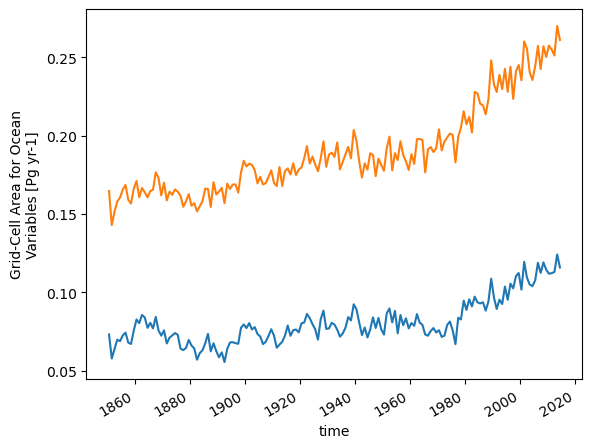

In [104]:
ds1 = xr.open_dataset("MPI-test-acrtic-masked.nc")
ds2 = xr.open_dataset("MPI-test-arctic.nc")
ds3 = xr.open_dataset("MPI-test-global.nc")

for ds in [ds1, ds2]:
    ds.fgco2.plot()

In [3]:
test = xr.open_dataset(files[0])
test

<xarray.Dataset>
Dimensions:             (time: 240, bnds: 2, j: 220, i: 256, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1990-01-16T12:00:00 ... 2009-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
    depth               float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    fgco2               (time, j, i) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            fgco2
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/65d79638-9d94-46eb-8bb7-857eed8e8d26

In [83]:
ds4 = ds2.where(ds2.lat>60).copy()

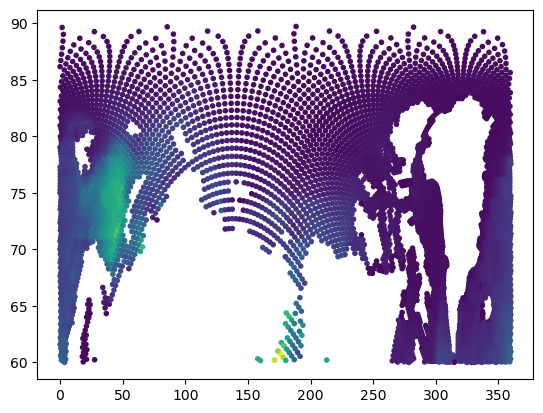

In [100]:
ds2 = xr.open_dataset("MPI-test-arctic_gridded.nc")
plt.scatter(ds2.lon, ds2.lat, c=ds2.fgco2.isel(time=-1), marker=".")


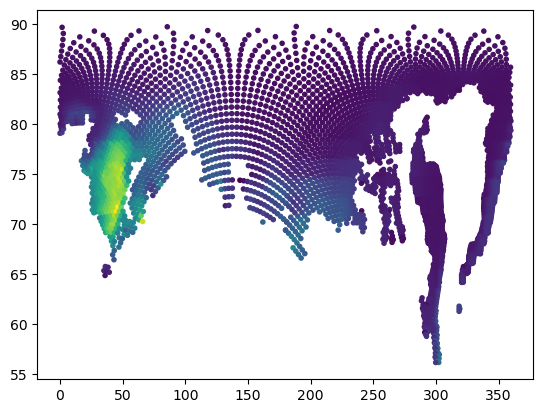

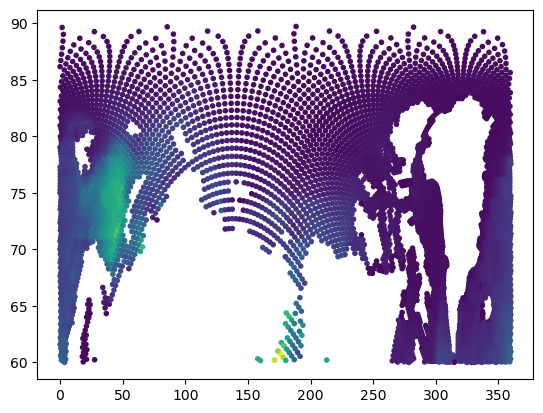

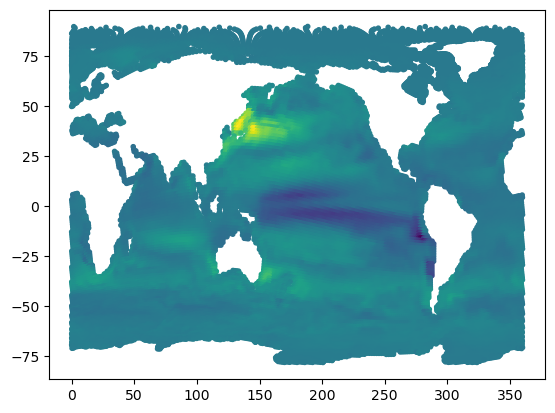

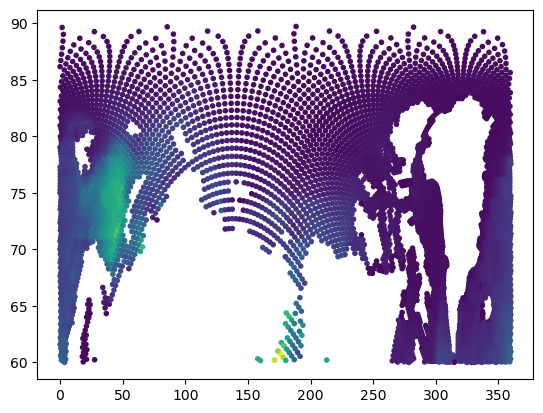

In [101]:
ds1 = xr.open_dataset("MPI-test-acrtic-masked_gridded.nc")
ds2 = xr.open_dataset("MPI-test-arctic_gridded.nc")
ds3 = xr.open_dataset("MPI-test-global_gridded.nc")

for ds in [ds1, ds2, ds3, ds4]:
    plt.figure()
    plt.scatter(ds.lon, ds.lat, c=ds.fgco2.isel(time=-1), marker=".")
    #ds.fgco2.isel(time=-1).plot()